<a href="https://colab.research.google.com/github/adrcynical01/DLI_Assignment/blob/main/DLI_Assignment_Official.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.0 Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

1.1 Loading Dataset from google drive

1.1A Loading through CSV file

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

1.1B Loading through Mounting Address

In [ ]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/phishing_dataset.csv')

print("Number of total records:", len(dataset))
print()
dataset.head()

Mounted at /content/drive
Number of total records: 11054



,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,Result
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


2.0 Preparing the Data

In [ ]:
# Separate input features (X) from the target label (y)
# 'Result' is the column that contains the label: 1 = phishing, -1 = legitimate
X = dataset.drop('Result', axis=1).values
y = dataset['Result'].values

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split into training and test sets using stratified sampling to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert labels from -1/1 to 0/1 for binary classification
y_train = np.where(y_train == -1, 0, 1)
y_test = np.where(y_test == -1, 0, 1)

# Optional: Check class distribution to confirm balance
print("Train set class distribution:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Test set class distribution:", dict(zip(*np.unique(y_test, return_counts=True))))

Train set class distribution: {np.int64(0): np.int64(3918), np.int64(1): np.int64(4925)}
Test set class distribution: {np.int64(0): np.int64(979), np.int64(1): np.int64(1232)}


3.0 Defining the Neural Network Model

In [ ]:
# Importing the Neccessary Libraries for Neural Network

from keras.models import Sequential
from keras.layers import Dense

4.0 Compiling and Training the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import numpy as np

# Rebuild the model with more capacity
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # More neurons
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary output

# Print model architecture
model.summary()

# Compile the model using binary crossentropy for binary classification
# 'adam' optimizer adjusts learning efficiently
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting if val_loss stops improving
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compute class weights from training labels
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}
print("Class Weights:", class_weight_dict)

# Train the model with training data, using 20% for validation
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    class_weight=class_weight_dict,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

Class Weights: {np.int64(0): np.float64(1.1285094435936702), np.int64(1): np.float64(0.8977664974619289)}
Epoch 1/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8724 - loss: 0.3430 - val_accuracy: 0.9214 - val_loss: 0.1862
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9342 - loss: 0.1656 - val_accuracy: 0.9231 - val_loss: 0.1689
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9432 - loss: 0.1417 - val_accuracy: 0.9276 - val_loss: 0.1575
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9488 - loss: 0.1245 - val_accuracy: 0.9339 - val_loss: 0.1470
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9535 - loss: 0.1110 - val_accuracy: 0.9350 - val_loss: 0.1395
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9575 - loss: 0.1008 - val_accuracy: 0.9367 - val_loss: 0.1339
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9613 - loss: 0.0921 - val_accuracy: 0.9435 - val_loss: 0.129

4.1 Baseline Comparison using Decision Tree

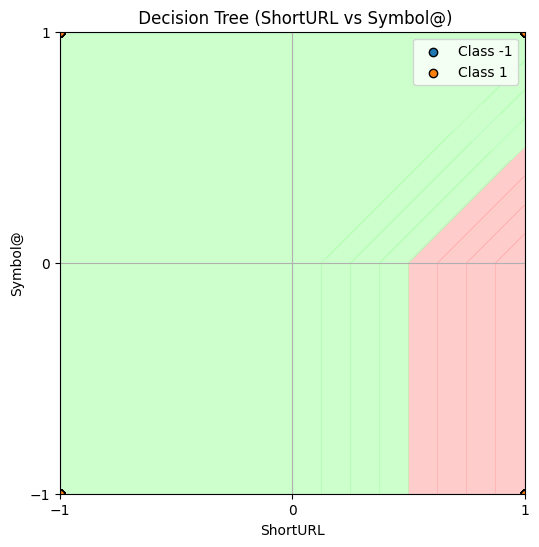

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Select 2 binary/categorical features (e.g., ShortURL and Symbol@)
feature_names = ['ShortURL', 'Symbol@']
X_vis = dataset[feature_names].values
y_vis = dataset['Result'].values

# Train a simple decision tree classifier
dt_vis = DecisionTreeClassifier(random_state=42)
dt_vis.fit(X_vis, y_vis)

# Create a discrete meshgrid covering -1 to 1 for both features
xx, yy = np.meshgrid(np.arange(-1, 2, 1), np.arange(-1, 2, 1))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = dt_vis.predict(grid_points).reshape(xx.shape)

# Plot decision surface using discrete levels
plt.figure(figsize=(6, 6))
cmap_bg = ListedColormap(['#FFAAAA', '#AAFFAA'])  # background
plt.contourf(xx, yy, Z, cmap=cmap_bg, alpha=0.6)

# Overlay actual points
for class_value in np.unique(y_vis):
    plt.scatter(X_vis[y_vis == class_value, 0],
                X_vis[y_vis == class_value, 1],
                label=f"Class {class_value}",
                edgecolor='k')

plt.title(" Decision Tree (ShortURL vs Symbol@)")
plt.xlabel('ShortURL')
plt.ylabel('Symbol@')
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.legend()
plt.grid(True)
plt.show()

4.2 Logistic Regression comparison with Neural Network

=== Logistic Regression: classification report ===
              precision    recall  f1-score   support

           0      0.926     0.930     0.928       979
           1      0.944     0.941     0.942      1232

    accuracy                          0.936      2211
   macro avg      0.935     0.935     0.935      2211
weighted avg      0.936     0.936     0.936      2211



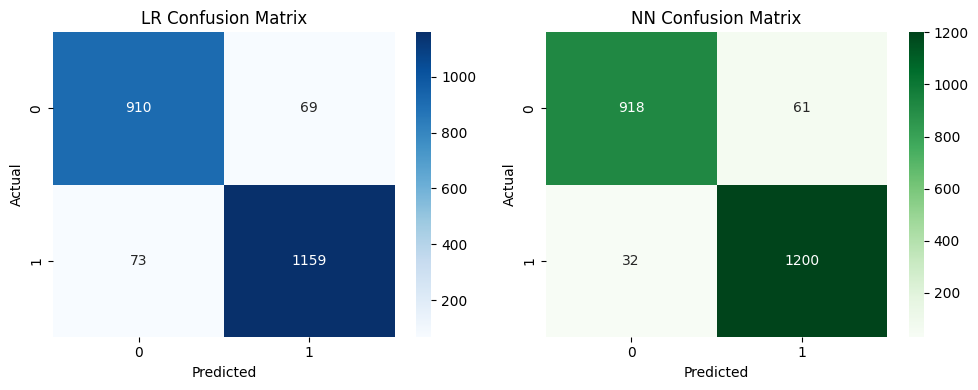

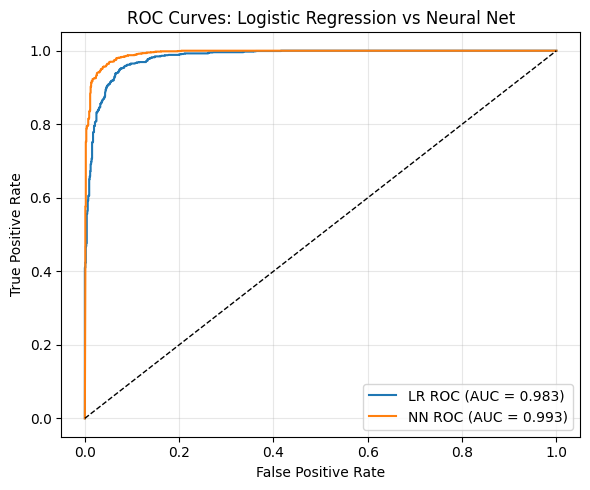

,Accuracy,Precision,Recall,F1,ROC-AUC
Model,,,,,
Logistic Regression,0.936,0.944,0.941,0.942,0.983
Neural Net (Keras),0.958,0.952,0.974,0.963,0.993


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

# 1) Train Logistic Regression (with scaling)
lr = make_pipeline(
    StandardScaler(),  # helps LR converge / perform better
    LogisticRegression(max_iter=500, class_weight='balanced', solver='lbfgs')
)
lr.fit(X_train, y_train)

# 2) LR predictions & probabilities
y_lr_prob = lr.predict_proba(X_test)[:, 1]
y_lr_pred = (y_lr_prob >= 0.5).astype(int)

# 3) NN predictions (recompute if not already available)
try:
    y_nn_prob = y_prob.ravel()
    y_nn_pred = y_pred.ravel().astype(int)
except NameError:
    y_nn_prob = model.predict(X_test, verbose=0).ravel()
    y_nn_pred = (y_nn_prob >= 0.5).astype(int)

# 4) Metrics
def metrics(y_true, y_hat, y_scores):
    return {
        "Accuracy": accuracy_score(y_true, y_hat),
        "Precision": precision_score(y_true, y_hat),
        "Recall": recall_score(y_true, y_hat),
        "F1": f1_score(y_true, y_hat),
        "ROC-AUC": roc_auc_score(y_true, y_scores)
    }

lr_metrics = metrics(y_test, y_lr_pred, y_lr_prob)
nn_metrics = metrics(y_test, y_nn_pred, y_nn_prob)

# 5) Print classification report for LR (optional)
print("=== Logistic Regression: classification report ===")
print(classification_report(y_test, y_lr_pred, digits=3))

# 6) Confusion matrices (optional visuals)
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_lr_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("LR Confusion Matrix"); axes[0].set_xlabel("Predicted"); axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_nn_pred), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("NN Confusion Matrix"); axes[1].set_xlabel("Predicted"); axes[1].set_ylabel("Actual")
plt.tight_layout(); plt.show()

# 7) Combined ROC (LR vs NN)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr_prob)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_nn_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"LR ROC (AUC = {lr_metrics['ROC-AUC']:.3f})")
plt.plot(fpr_nn, tpr_nn, label=f"NN ROC (AUC = {nn_metrics['ROC-AUC']:.3f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves: Logistic Regression vs Neural Net")
plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

# 8) Side-by-side metrics table
comparison_df = pd.DataFrame([
    {"Model": "Logistic Regression", **lr_metrics},
    {"Model": "Neural Net (Keras)", **nn_metrics},
]).set_index("Model")

display(comparison_df.style.format("{:.3f}"))


5.0 Model Evaluation

In [ ]:
# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (accuracy * 100))


Test Accuracy: 95.79%


6.0 Additional Metrics and Evaluation

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 Score: 0.9626955475330926
ROC-AUC Score: 0.9931101839937386


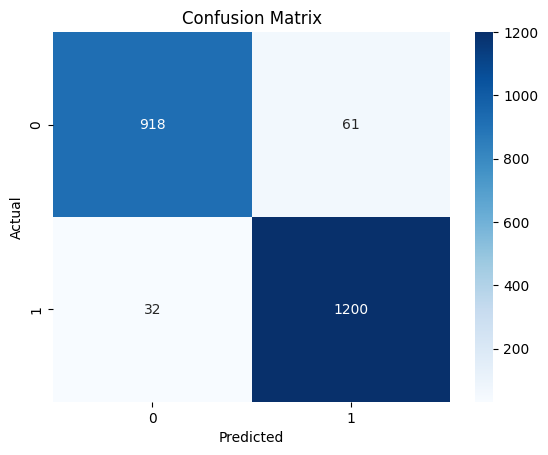

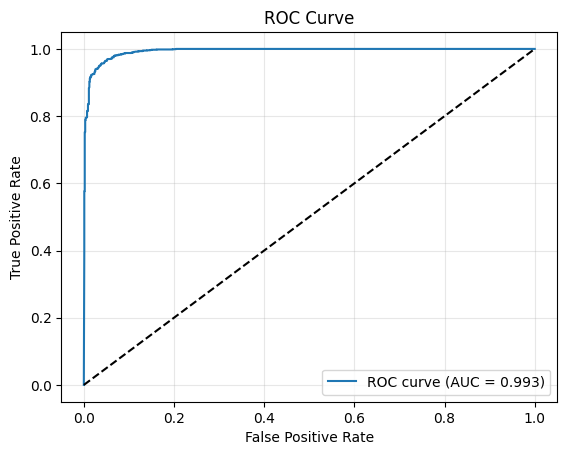

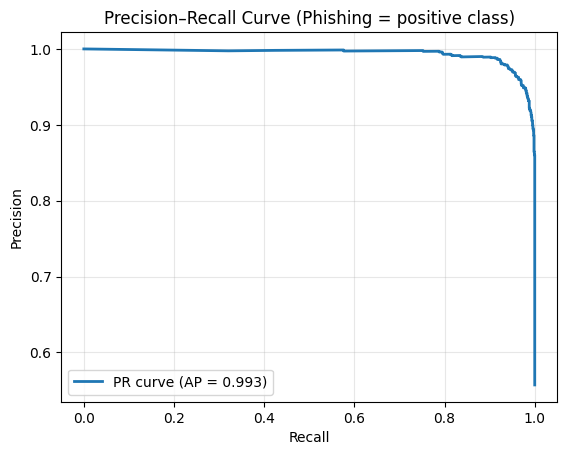

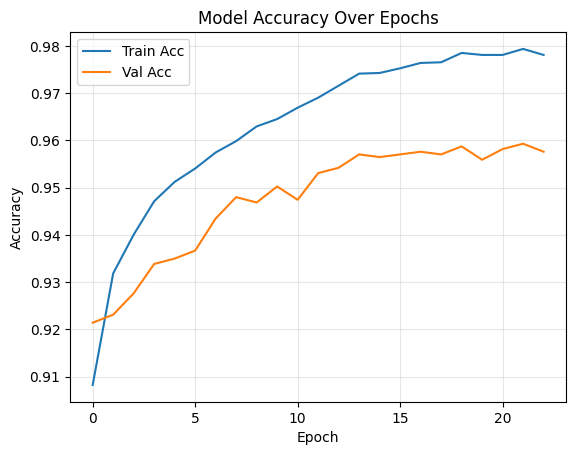

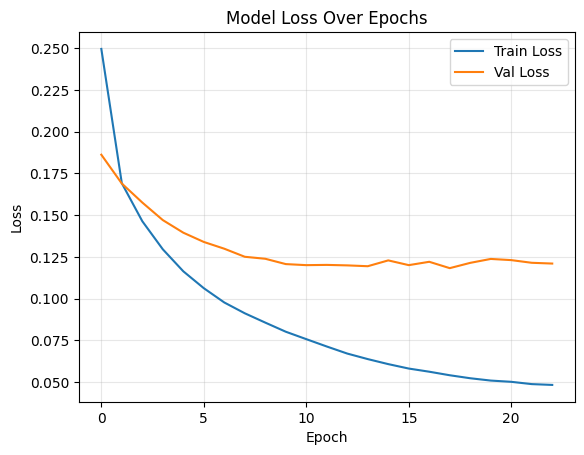

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict probabilities and convert to binary predictions (threshold = 0.5)
y_prob = model.predict(X_test)
y_prob_flat = y_prob.ravel()  # ensure 1-D for metrics that expect it
y_pred = (y_prob_flat > 0.5).astype(int)

# Use y_test and y_pred directly (already in 0/1 format)
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_flat))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_flat)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob_flat):.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ---------- Precision–Recall Curve (ADDED) ----------
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_flat)  # positive class = 1
ap = average_precision_score(y_test, y_prob_flat)

plt.plot(recall, precision, lw=2, label=f"PR curve (AP = {ap:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Phishing = positive class)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# ----------------------------------------------------

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Final F1-score verdict
final_f1 = f1_score(y_test, y_pred)
print(f"\n✅ Verdict: Achieved F1 = {final_f1:.2f}, target {'met ✅' if final_f1 >= 0.90 else 'not met ❌'}")


✅ Verdict: Achieved F1 = 0.96, target met ✅


In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Precision: 0.9516256938937351
Recall: 0.974025974025974


6.1 Exporting Figures

In [ ]:
import os

# Ensure figures directory exists
os.makedirs("figures", exist_ok=True)

# Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("figures/confusion_matrix.png")
plt.close()

# ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig("figures/roc_curve.png")
plt.close()

# PR Curve
from sklearn.metrics import precision_recall_curve
prec, rec, _ = precision_recall_curve(y_test, y_prob)
plt.figure()
plt.plot(rec, prec, label="PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.savefig("figures/pr_curve.png")
plt.close()

# Accuracy/Loss Curves
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("figures/accuracy_loss.png")
plt.close()

7.0 Saving and Loading the Model

In [ ]:
# Save the trained model to disk
model.save('phishing_model.keras')

# Later, load the model to reuse without retraining
from keras.models import load_model
loaded_model = load_model('phishing_model.keras')

8.0 Making Prediction

In [ ]:
import numpy as np

# List of all 30 feature names (from your dataset)
feature_names = [
    'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//', 'PrefixSuffix-', 'SubDomains',
    'HTTPS', 'DomainRegLen', 'Favicon', 'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
    'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding',
    'StatusBarCust', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
    'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage', 'StatsReport'
]

# Prompt the user for each feature value
input_values = []
print("To test the model manually, enter values for each of the 30 features (-1, 0, or 1) below. The model will predict if the website is phishing or legitimate11:")
for name in feature_names:
    while True:
        try:
            val = int(input(f"{name}: "))
            if val in [-1, 0, 1]:
                input_values.append(val)
                break
            else:
                print("Enter only -1, 0, or 1.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

# Convert input to array for prediction
sample_input = np.array([input_values])

# Predict using the loaded model
prediction = loaded_model.predict(sample_input)
predicted_class = np.where(prediction > 0.5, 1, -1)[0][0]

# Print result
if predicted_class == 1:
    print("🔒 This website is predicted to be PHISHING.")
else:
    print("✅ This website is predicted to be LEGITIMATE.")

To test the model manually, enter values for each of the 30 features (-1, 0, or 1) below. The model will predict if the website is phishing or legitimate11:
UsingIP: -1
LongURL: -1
ShortURL: -1
Symbol@: -1
Redirecting//: -1
PrefixSuffix-: -1
SubDomains: 1
HTTPS: 1
DomainRegLen: -1
Favicon: -1
NonStdPort: -1
HTTPSDomainURL: -1
RequestURL: -1
AnchorURL: 1
LinksInScriptTags: 1
ServerFormHandler: -1
InfoEmail: -1
AbnormalURL: -1
WebsiteForwarding: -1
StatusBarCust: 1
DisableRightClick: 1
UsingPopupWindow: 1
IframeRedirection: 0
AgeofDomain: 0
DNSRecording: 0
WebsiteTraffic: -1
PageRank: -1
GoogleIndex: -1
LinksPointingToPage: 1
StatsReport: -1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
🔒 This website is predicted to be PHISHING.


In [ ]:
#  Launch Streamlit GUI from Colab

!pip -q install streamlit pyngrok tensorflow scikit-learn pandas numpy matplotlib

# 2) get your token: https://dashboard.ngrok.com/get-started/your-authtoken
NGROK_TOKEN = "31dBJrdCaEkDJ3fUSAAgXHPU3uO_23apZ74ewQPotnzy7bgTr"  #
if NGROK_TOKEN:
    !ngrok authtoken $NGROK_TOKEN

# 3) clone repo (adjust URL/branch if needed)
import os, shutil, subprocess, sys, pathlib

REPO_URL = "https://github.com/adrcynical01/DLI_Assignment.git"
REPO_DIR = "/content/DLI_Assignment"

if os.path.exists(REPO_DIR):
    shutil.rmtree(REPO_DIR)
!git clone $REPO_URL $REPO_DIR -q

# 4) verify streamlit app exists
APP_PATH = os.path.join(REPO_DIR, "streamlit_app.py")
assert os.path.exists(APP_PATH), f"streamlit_app.py not found at {APP_PATH}"

# 5) ensure model file exists next to the app
MODEL_NAME = "phishing_model.keras"
MODEL_PATH = os.path.join(REPO_DIR, MODEL_NAME)

if not os.path.exists(MODEL_PATH):
    print(f"[INFO] {MODEL_NAME} not found in repo. Upload it now...")
    from google.colab import files
    uploaded = files.upload()  # choose phishing_model.keras
    # move uploaded model into repo dir if uploaded to current working dir
    for fname in uploaded.keys():
        src = f"/content/{fname}"
        if os.path.exists(src) and fname == MODEL_NAME:
            shutil.move(src, MODEL_PATH)
            print(f"[INFO] Moved {fname} -> {MODEL_PATH}")

# 6) launch streamlit headlessly and expose via ngrok
from pyngrok import ngrok
ngrok.kill()  # clean up any stale tunnels

# start streamlit app
proc = subprocess.Popen(
    ["streamlit", "run", APP_PATH, "--server.port=8501", "--server.headless=true"],
    stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True
)

# open public tunnel
public_url = ngrok.connect(8501)
print("\n✅ Streamlit running:")
print("   ", public_url)
print("\n👉 If you update code, stop with the cell-stop button and re-run this cell.")

# (optional) tail first few lines of the streamlit log so you can see it started
import itertools, time
print("\n--- Streamlit log (first ~30 lines) ---")
for line in itertools.islice(proc.stdout, 30):
    print(line.rstrip())
